## Data 512A Project Part4 - Project(Data Pre-Processing and Preliminary Analysis)

This part of project focused only on the Honolulu, Hwaii Data and completed the following tasks:
- Data acquisition and Data cleaning
- Detect missing values, and unchanged varialbes
- Multicollinearity Testing

In [1]:
# import all required packages
from matplotlib import dates as mdates
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### Step 1: Data acquisition and Data Cleaning

- extract general information and cases by date for Honolulu, Hawaii Data
- clean and format goverment response data, daily passenger count data, and Social Distance Index Data
- detect missing values and feature selection

In [2]:
# laod all input data
raw_us_cases = pd.read_csv("RAW_us_confirmed_cases.csv")
raw_SDI = pd.read_csv("Social distancing index_county.csv")
raw_goverment_response = pd.read_csv("oxford-government-response.csv")
tourist = pd.read_csv("tourist.csv", header = None)

In [3]:
## Clean confirmed cases Dataset
# Focus only on Honolulu, Hwaii Data
raw_Honolulu_cases = raw_us_cases[(raw_us_cases["Province_State"] == "Hawaii") & (raw_us_cases["Admin2"] == "Honolulu")]
# Save general information as DataFrame, first 12 columns
Honolulu_info = raw_Honolulu_cases[raw_Honolulu_cases.columns[0:11]]
# Save cases by Date Data as DataFrame
Honolulu_cases_by_date = raw_Honolulu_cases[raw_Honolulu_cases.columns[11:]]
# Pivot the DataFrame for better readinng
Honolulu_cases_by_date = pd.DataFrame(Honolulu_cases_by_date.iloc[0])
Honolulu_cases_by_date = Honolulu_cases_by_date.reset_index()
# rename the columns
Honolulu_cases_by_date.columns = ["Date", "Cases"]
# convert date to pandas datetime
Honolulu_cases_by_date["Date"] = pd.to_datetime(Honolulu_cases_by_date["Date"])
# since the SDI data is only availble before 2021-4-20, take observation from 2020-4-20 to 2021-4-20
# subset the data to match the mask policy data
Honolulu_cases_by_date_part = Honolulu_cases_by_date.loc[89:458,].reset_index(drop=True) # also calculate 1-day, 7-days, 14-days delayed confirm cases for modeling
# calculate daily cases from case
Honolulu_cases_by_date_part['Daily_Cases'] = Honolulu_cases_by_date_part['Cases'].diff()
# replace first row from NAN to 1
Honolulu_cases_by_date_part.iloc[0,2]=1
# change negetive values to 0
Honolulu_cases_by_date_part['Daily_Cases'] = Honolulu_cases_by_date_part['Daily_Cases'].clip(lower=0)
Honolulu_cases_by_date_part

,Date,Cases,Daily_Cases
0,2020-04-20,385,1.0
1,2020-04-21,385,0.0
2,2020-04-22,388,3.0
3,2020-04-23,389,1.0
4,2020-04-24,392,3.0
...,...,...,...
365,2021-04-20,24754,24.0
366,2021-04-21,24797,43.0
367,2021-04-22,24869,72.0
368,2021-04-23,24981,112.0


In [4]:
## Clean Social Distance Index Dataset
# Focus only on Honolulu, Hwaii Data
raw_Honolulu_SDI = raw_SDI[raw_SDI["NAME"] == "Honolulu County"]
# Save general information as DataFrame, first 2 columns
Honolulu_SDI_by_date = raw_Honolulu_SDI[raw_Honolulu_SDI.columns[2:]]
Honolulu_SDI_by_date = pd.DataFrame(Honolulu_SDI_by_date.iloc[0])
# reset index, change column names
Honolulu_SDI_by_date = Honolulu_SDI_by_date.reset_index()
Honolulu_SDI_by_date.columns = ["Date", "SDI"]
Honolulu_SDI_by_date["Date"] = pd.to_datetime(Honolulu_SDI_by_date["Date"])
# since the SDI data is only availble before 2021-4-20, take observation from 2020-4-20 to 2021-4-20
# subset the data to match the mask policy data
Honolulu_SDI_by_date_part = Honolulu_SDI_by_date.loc[110:,].reset_index(drop=True)
Honolulu_SDI_by_date_part

,Date,SDI
0,2020-04-20,67.0
1,2020-04-21,67.0
2,2020-04-22,63.0
3,2020-04-23,66.0
4,2020-04-24,64.0
...,...,...
361,2021-04-16,23.0
362,2021-04-17,26.0
363,2021-04-18,31.0
364,2021-04-19,20.0


In [5]:
## Clean goverment responses Dataset
# Focus only on Honolulu, Hwaii Data
raw_Honolulu_response = raw_goverment_response[(raw_goverment_response["location_key"] == "US_HI")]
Honolulu_response_by_date = raw_Honolulu_response.drop('location_key', axis=1).reset_index(drop=True)
Honolulu_response_by_date ["date"] = pd.to_datetime(Honolulu_response_by_date["date"])
# since the SDI data is only availble before 2021-4-20, take observation from 2020-4-20 to 2021-4-20
# subset the data to match the mask policy data
Honolulu_response_by_date_part = Honolulu_response_by_date.loc[110:475,].reset_index(drop=True)
Honolulu_response_by_date_part

,date,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,...,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
0,2020-04-20,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,...,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,76.85
1,2020-04-21,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,...,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,76.85
2,2020-04-22,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,...,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,76.85
3,2020-04-23,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,...,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,76.85
4,2020-04-24,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,...,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,76.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-04-16,2.0,2.0,2.0,4.0,0.0,2.0,2.0,3.0,1.0,...,0.0,0.0,2.0,3.0,2.0,NaN,NaN,3.0,3.0,69.44
362,2021-04-17,2.0,2.0,2.0,4.0,0.0,2.0,2.0,3.0,1.0,...,0.0,0.0,2.0,3.0,2.0,NaN,NaN,3.0,3.0,69.44
363,2021-04-18,2.0,2.0,2.0,4.0,0.0,2.0,2.0,3.0,1.0,...,0.0,0.0,2.0,3.0,2.0,NaN,NaN,3.0,3.0,69.44
364,2021-04-19,2.0,2.0,2.0,4.0,0.0,2.0,2.0,3.0,1.0,...,0.0,0.0,2.0,3.0,2.0,0.0,0.0,3.0,5.0,69.44


In [6]:
# merge goverment responses with SDI data
Honolulu_dataset = Honolulu_response_by_date_part.copy()
Honolulu_dataset['SDI'] = Honolulu_SDI_by_date_part['SDI']

In [7]:
# Find and Print missing values
dbLength = len(Honolulu_dataset)
columnNames = list(set(Honolulu_dataset))

# loop over the column names and print missing values in each column
for column in columnNames:
    numMissing = Honolulu_dataset[column].isnull().sum()
    print("Number of missing values in", column, ":", numMissing)

Number of missing values in date : 0
Number of missing values in international_travel_controls : 1
Number of missing values in contact_tracing : 0
Number of missing values in stringency_index : 0
Number of missing values in restrictions_on_gatherings : 0
Number of missing values in income_support : 0
Number of missing values in fiscal_measures : 58
Number of missing values in emergency_investment_in_healthcare : 35
Number of missing values in vaccination_policy : 0
Number of missing values in debt_relief : 0
Number of missing values in international_support : 0
Number of missing values in facial_coverings : 0
Number of missing values in investment_in_vaccines : 35
Number of missing values in workplace_closing : 0
Number of missing values in restrictions_on_internal_movement : 0
Number of missing values in public_transport_closing : 0
Number of missing values in stay_at_home_requirements : 0
Number of missing values in public_information_campaigns : 0
Number of missing values in SDI : 0

In [8]:
# drop variables with more than 10% missing values, and fill NAs for variables with less than 10% missing.
Honolulu_dataset.drop(['investment_in_vaccines','emergency_investment_in_healthcare','fiscal_measures'], axis=1, inplace=True)
Honolulu_dataset["international_travel_controls"].fillna(0, inplace = True)
Honolulu_dataset

,date,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,international_support,public_information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,stringency_index,SDI
0,2020-04-20,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,76.85,67.0
1,2020-04-21,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,76.85,67.0
2,2020-04-22,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,76.85,63.0
3,2020-04-23,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,76.85,66.0
4,2020-04-24,3.0,3.0,1.0,4.0,0.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,76.85,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-04-16,2.0,2.0,2.0,4.0,0.0,2.0,2.0,3.0,1.0,2.0,0.0,2.0,3.0,2.0,3.0,3.0,69.44,23.0
362,2021-04-17,2.0,2.0,2.0,4.0,0.0,2.0,2.0,3.0,1.0,2.0,0.0,2.0,3.0,2.0,3.0,3.0,69.44,26.0
363,2021-04-18,2.0,2.0,2.0,4.0,0.0,2.0,2.0,3.0,1.0,2.0,0.0,2.0,3.0,2.0,3.0,3.0,69.44,31.0
364,2021-04-19,2.0,2.0,2.0,4.0,0.0,2.0,2.0,3.0,1.0,2.0,0.0,2.0,3.0,2.0,3.0,5.0,69.44,20.0


In [9]:
# Find and Print number of 0 values in each variable
dbLength = len(Honolulu_dataset)
columnNames = list(set(Honolulu_dataset))

# loop over the column names and print number of zero values in each column
for column in columnNames:
    numMissing = (Honolulu_dataset[column]==2).sum()
    print("Number of 0 values in", column, ":", numMissing)

Number of 0 values in date : 0
Number of 0 values in international_travel_controls : 0
Number of 0 values in contact_tracing : 330
Number of 0 values in stringency_index : 0
Number of 0 values in restrictions_on_gatherings : 0
Number of 0 values in income_support : 102
Number of 0 values in vaccination_policy : 84
Number of 0 values in debt_relief : 240
Number of 0 values in international_support : 0
Number of 0 values in facial_coverings : 73
Number of 0 values in workplace_closing : 351
Number of 0 values in restrictions_on_internal_movement : 366
Number of 0 values in public_transport_closing : 0
Number of 0 values in stay_at_home_requirements : 344
Number of 0 values in public_information_campaigns : 366
Number of 0 values in SDI : 0
Number of 0 values in school_closing : 240
Number of 0 values in testing_policy : 129
Number of 0 values in cancel_public_events : 278


In [10]:
# drop variables with only 0 values
Honolulu_dataset.drop(['vaccination_policy','international_support'], axis=1, inplace=True)

In [11]:
# repeat the above process and drop variables that stay unchanged (i.e., have identical values for all rows)
Honolulu_dataset.drop(['debt_relief','restrictions_on_internal_movement','stay_at_home_requirements','international_travel_controls','public_information_campaigns','restrictions_on_gatherings','income_support','public_information_campaigns'], axis=1, inplace=True)

In [12]:
# report the data info after preprocessing
Honolulu_dataset.info()
Honolulu_dataset_numeric = Honolulu_dataset[list(Honolulu_dataset._get_numeric_data().columns)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      366 non-null    datetime64[ns]
 1   school_closing            366 non-null    float64       
 2   workplace_closing         366 non-null    float64       
 3   cancel_public_events      366 non-null    float64       
 4   public_transport_closing  366 non-null    float64       
 5   testing_policy            366 non-null    float64       
 6   contact_tracing           366 non-null    float64       
 7   facial_coverings          366 non-null    float64       
 8   stringency_index          366 non-null    float64       
 9   SDI                       366 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 28.7 KB


#### Step 2: Muticollinearity Tests

- Calculated Pearson Correlation Coefficient for each pear of variables, and plot a heat map
- Calculated Variance Inflation Factor
- Drop variables with high VIF and high correlations with other variables

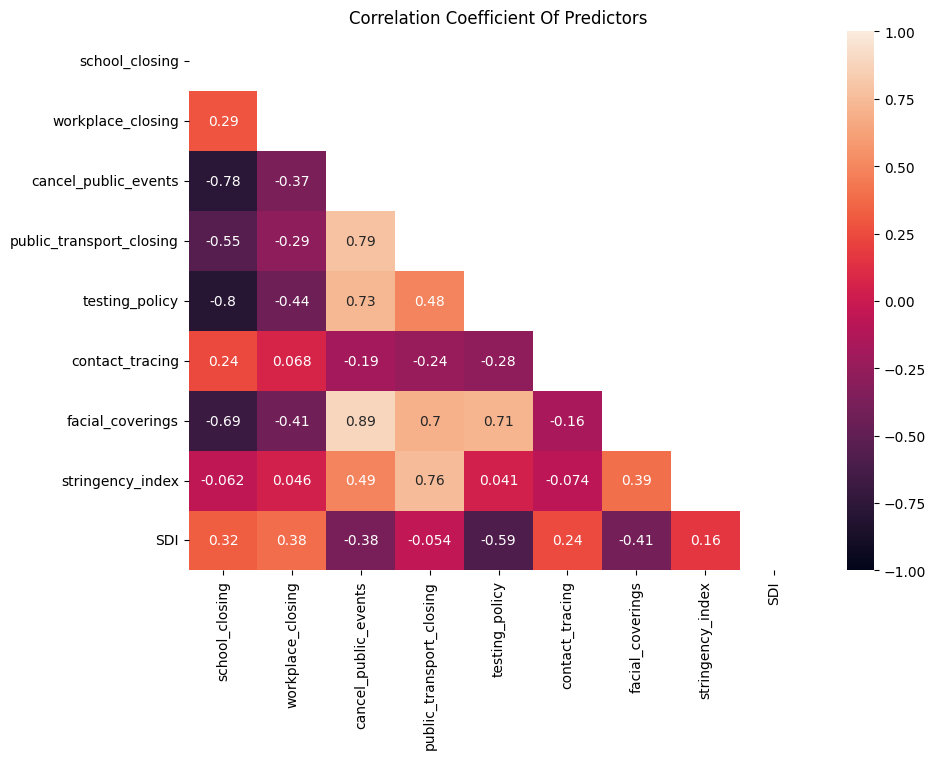

In [13]:
## Plot heat map of Pearson Correlation Coefficient
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(Honolulu_dataset_numeric.corr(), dtype=bool))

# generate heatmap
sns.heatmap(Honolulu_dataset_numeric.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [14]:
## Calculated VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = Honolulu_dataset_numeric[considered_features].copy()
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [15]:
# compute VIF use the defiend fucntion
considered_features = list(Honolulu_dataset_numeric.columns)
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
2,cancel_public_events,11.340655
3,public_transport_closing,8.042267
0,school_closing,6.611896
7,stringency_index,6.392624
6,facial_coverings,5.151146
4,testing_policy,4.699721
8,SDI,2.283208
1,workplace_closing,1.686978
5,contact_tracing,1.217730


In [16]:
# remove variables with VIF score > 5
considered_features.remove('cancel_public_events')
considered_features.remove('public_transport_closing')
considered_features.remove('testing_policy')
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,facial_coverings,3.373013
0,school_closing,2.222538
4,stringency_index,1.625625
5,SDI,1.537526
1,workplace_closing,1.340548
2,contact_tracing,1.127542


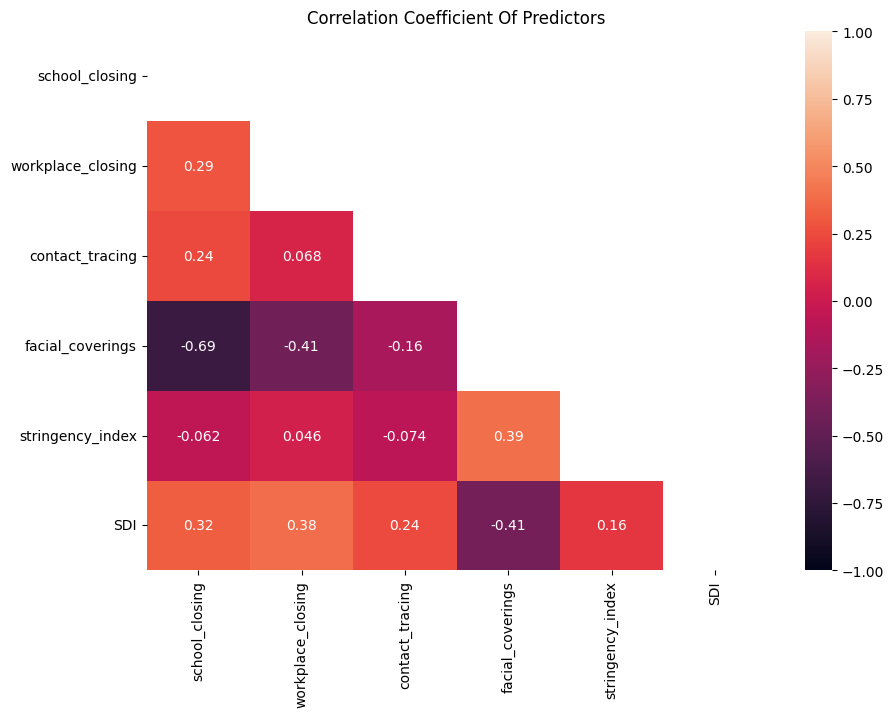

In [17]:
## Re-plot the heat map after multicolinearity test
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(Honolulu_dataset_numeric[considered_features].corr(), dtype=bool))

# generate heatmap
sns.heatmap(Honolulu_dataset_numeric[considered_features].corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [18]:
# modify data types and add response variables
considered_features.insert(0,'date')
Honolulu_dataset_selected = Honolulu_dataset[considered_features].copy()
Honolulu_dataset_selected['daily_confirm_cases'] = Honolulu_cases_by_date_part['Daily_Cases']
Honolulu_dataset_selected['daily_confirm_cases'] = Honolulu_dataset_selected['daily_confirm_cases'].astype("int")
Honolulu_dataset_selected

,date,school_closing,workplace_closing,contact_tracing,facial_coverings,stringency_index,SDI,daily_confirm_cases
0,2020-04-20,3.0,3.0,2.0,2.0,76.85,67.0,1
1,2020-04-21,3.0,3.0,2.0,2.0,76.85,67.0,0
2,2020-04-22,3.0,3.0,2.0,2.0,76.85,63.0,3
3,2020-04-23,3.0,3.0,2.0,2.0,76.85,66.0,1
4,2020-04-24,3.0,3.0,2.0,2.0,76.85,64.0,3
...,...,...,...,...,...,...,...,...
361,2021-04-16,2.0,2.0,2.0,3.0,69.44,23.0,115
362,2021-04-17,2.0,2.0,2.0,3.0,69.44,26.0,48
363,2021-04-18,2.0,2.0,2.0,3.0,69.44,31.0,93
364,2021-04-19,2.0,2.0,2.0,3.0,69.44,20.0,52


#### Step 3: Generate outputs dataset

- Generate "Honolulu_dataset_tourist.csv" with daily passenger count as response variable
- Generate "Honolulu_dataset.csv" with daily confirmed cases as response variable
- Generate "Honolulu_dataset_delayn.csv" with daily confirmed cases delay by n days

In [19]:
# output dataset
Honolulu_dataset_selected.to_csv("Honolulu_dataset.csv", encoding='utf-8', index=False)

In [29]:
# add daily passenger arrivals data to df
Honolulu_dataset_selected['tourist'] = tourist.loc[:,0]

In [30]:
# output dataset
Honolulu_dataset_selected.to_csv("Honolulu_dataset_tourist.csv", encoding='utf-8', index=False)